 <h1 align="center" style="color:#4ca8ed">Інтелектульний аналіз даних.<br>Группа: БС-81<br>Мумінов А.O.<br><br>Тема: 2.Міри відстані та кластерний аналіз методом к-середніх</h1>

### Завдання
1. Реалізувати різні види метрик у вигляді окремих функцій.
2. Реалізувати алгоритм кластеризації к-середніх з використанням розроблених метрих.
3. Провести кластерний аналіз з розбиттям на 3, 4 та 5 кластерів на стендартизованих даних (згідно варіанту).
4. Візуалізувати результати кластеризації.

In [2]:
import pandas as pd
import numpy as np
import random as rn
import PrData as pr

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

ModuleNotFoundError: No module named 'PrData'

In [2]:
data = pd.read_csv('dmd.csv') #ck,age,carrier
del data['Unnamed: 0']
data

,hospid,age,sdate,ck,h,pk,ld,carrier,obsno
0,657,27,6497,22.0,99.000000,10.798828,NaN,0,1
1,667,31,6528,29.0,94.000000,11.798828,NaN,0,1
2,669,22,6558,22.0,85.500000,15.000000,NaN,0,1
3,671,25,6497,41.0,87.296875,15.000000,NaN,0,1
4,673,26,6558,28.0,93.500000,7.000000,NaN,0,1
...,...,...,...,...,...,...,...,...,...
204,1496,32,7288,610.0,111.687500,NaN,593.0,1,1
205,1513,30,7288,510.0,60.195312,NaN,272.0,1,1
206,1531,36,7319,55.0,20.699219,NaN,262.0,1,1
207,1536,31,7319,45.0,13.798828,NaN,217.0,1,1


 <h1 align="center" style="color:#4ca8ed">1.Функції реалізації різних метрик.</h1>

In [3]:
def metric_Euclid(x1, x2):
    return sum([(x1[i]-x2[i])**2 for i in range(len(x1[:]))])**0.5

def metric_2Euclid(x1, x2):
    return sum([(x1[i]-x2[i])**2 for i in range(len(x1[:]))])

def metric_Manhattan(x1, x2):
    return sum([abs(x1[i]-x2[i]) for i in range(len(x1[:]))])

def metric_Сhebyshev(x1, x2):
    return max([abs(x1[i]-x2[i]) for i in range(len(x1[:]))])

def metric_Sedate(x1, x2, p = 2, s = 0.5):
    return sum([(x1[i]-x2[i])**p for i in range(len(x1[:]))])**s

In [4]:
x1 = data[['age','ck','carrier']][:1].iloc[0]
x2 =data[['age','ck','carrier']][1:2].iloc[0]
print('metric_Euclid    = ' + str(metric_Euclid(x1,x2)))
print('metric_2Euclid   = ' + str(metric_2Euclid(x1,x2)))
print('metric_Manhattan = ' + str(metric_Manhattan(x1,x2)))
print('metric_Сhebyshev = ' + str(metric_Сhebyshev(x1,x2)))
print('metric_Sedate    = ' + str(metric_Sedate(x1,x2)))

metric_Euclid    = 8.06225774829855
metric_2Euclid   = 65.0
metric_Manhattan = 11.0
metric_Сhebyshev = 7.0
metric_Sedate    = 8.06225774829855


 <h1 align="center" style="color:#4ca8ed">2. Реалізувати алгоритм кластеризації к-середніх з використанням розроблених метрих.</h1>

In [5]:
def k_means(dt, col, k = 2, metric = metric_Euclid, p = 2):
    data = dt[col][:].values
#     clusters = [[rn.choice(data)] for i in range(k)] # Задання початкових центрів
    clusters = [[data[i]] for i in range(k)]
    print(clusters)
    check_clusters = [[] for i in range(k-1)] # Для заповнення даними з минулої ітерації і перевірки
    while (True):
        #Заповнюємо кластери
        for i in data:
            # Дистанції від точки до кожного кластера
            if (metric.__name__ != 'metric_Sedate'):
                list_dist = [metric(clusters[j][0],i) for j in range(k)] 
            else:
                list_dist = [metric(clusters[j][0],i,p) for j in range(k)] 
            clusters[list_dist.index(min(list_dist))].append(i)
        for i in range(k):
            print(len(clusters[i]))
        print('-'*30)
        check_clusters = [[clusters[i][0]] for i in range(k-1)]
        #Перерахунок центрів на середні арифметичні по координатам
        mean = [np.array([np.mean([clusters[z][j][i] for j in range(1,len(clusters[z]))]) 
              for i in range(len(clusters[0][0])) ]) for z in range(k)]
        #Перевірка на наявність змін у кластері
        print(mean)
        if (sum([np.array_equal(check_clusters[i][0], mean[i])  for i in range(k-1)])):
            return [pd.DataFrame(i,columns = col) for i in clusters]
        else:
            clusters = [[mean[i]] for i in range(k)]        #Додавання нових центрів кластерів

 <h1 align="center" style="color:#4ca8ed">3. Провести кластерний аналіз з розбиттям на 3, 4 та 5 кластерів на стендартизованих даних (згідно варіанту).</h1>

In [1]:
pr.FillGapsNum(data,'pk',3,0,'pkF')
pr.DnormalMM(data,'age','nage')
pr.DnormalMM(data,'pkF','npkF')
cl3 = k_means(data,['nage','npkF','carrier'],2)
print("Три кластера")
for i in cl3:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))

NameError: name 'pr' is not defined

In [7]:
cl4 = k_means(data,['nage','npkF','carrier'],4)
print("чотори кластера")
for i in cl4:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))

чотори кластера
Claster:
72
       nage      npkF  carrier
0  0.114050  0.092449      0.0
1  0.170732  0.074618      0.0
2  0.048780  0.113808      0.0
3  0.121951  0.113808      0.0
4  0.146341  0.039181      0.0
5  0.097561  0.083017      0.0
6  0.048780  0.109143      0.0
7  0.048780  0.092345      0.0
8  0.121951  0.116595      0.0
9  0.121951  0.121259      0.0
Claster:
76
       nage      npkF  carrier
0  0.442276  0.188530      1.0
1  0.585366  0.179106      1.0
2  0.365854  0.126853      1.0
3  0.341463  0.132464      1.0
4  0.439024  0.271442      1.0
5  0.268293  1.000000      1.0
6  0.804878  0.180964      1.0
7  0.219512  0.104479      1.0
8  0.536585  0.118472      1.0
9  0.365854  0.070883      1.0
Claster:
41
       nage      npkF  carrier
0  0.345615  0.097423      0.0
1  0.439024  0.101673      0.0
2  0.390244  0.097009      0.0
3  0.365854  0.128711      0.0
4  0.292683  0.136181      0.0
5  0.317073  0.101673      0.0
6  0.341463  0.104479      0.0
7  0.292683  0.116

In [8]:
cl5 = k_means(data,['nage','npkF','carrier'],5)
print("п'ять кластера")
for i in cl5:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))

п'ять кластера
Claster:
75
       nage      npkF  carrier
0  0.117666  0.089911      0.0
1  0.170732  0.074618      0.0
2  0.048780  0.113808      0.0
3  0.121951  0.113808      0.0
4  0.146341  0.039181      0.0
5  0.097561  0.083017      0.0
6  0.048780  0.109143      0.0
7  0.048780  0.092345      0.0
8  0.121951  0.116595      0.0
9  0.121951  0.121259      0.0
Claster:
24
       nage      npkF  carrier
0  0.332683  0.121332      0.0
1  0.439024  0.101673      0.0
2  0.390244  0.097009      0.0
3  0.365854  0.128711      0.0
4  0.292683  0.136181      0.0
5  0.317073  0.101673      0.0
6  0.341463  0.104479      0.0
7  0.292683  0.116595      0.0
8  0.268293  0.119401      0.0
9  0.243902  0.117524      0.0
Claster:
38
       nage      npkF  carrier
0  0.336585  0.056978      0.0
1  0.268293  0.083946      0.0
2  0.268293  0.077423      0.0
3  0.292683  0.076494      0.0
4  0.414634  0.085823      0.0
5  0.317073  0.087681      0.0
6  0.439024  0.056890      0.0
7  0.292683  0.0662

D:\ProgramsFiles\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\ProgramsFiles\Anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 <h1 align="center" style="color:#4ca8ed">4. Візуалізувати результати кластеризації.</h1>

In [9]:
def visualization2D_clusters(data):
    z = 0
    i = 1
    while(z < (len(data[0].iloc[0])-1)):
        fig = plt.figure(figsize=(10,5), dpi=120)
        ax = fig.add_axes([0,0,1,1])
        ax.set_xlabel(data[0].columns[i], fontsize=25)
        ax.set_ylabel(data[0].columns[z], fontsize=25)
        for j in range(len(data)):
            ax.scatter([data[j].iloc[x,i] for x in range(len(data[j]))],
                       [data[j].iloc[x,z] for x in range(len(data[j]))],
                       label=j,lw = 1)
            ax.scatter(data[j].iloc[0,i] ,data[j].iloc[0,z],label='Center - ' + str(j),alpha = 0.7,lw = 15)
        ax.legend()
        if (i == (len(data[0].iloc[0])-1)):
            z += 1
            i = z
        i+=1
        
def visualization3D_clusters(data,col = [0,1,2]):
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(data[0].columns[col[0]])
    ax.set_ylabel(data[0].columns[col[1]])
    ax.set_zlabel(data[0].columns[col[2]])
    for i in range(len(data)):
        ax.scatter([data[i].iloc[x,col[0]] for x in range(len(data[i]))],
                   [data[i].iloc[x,col[1]] for x in range(len(data[i]))],
                   [data[i].iloc[x,col[2]] for x in range(len(data[i]))])
    plt.show()

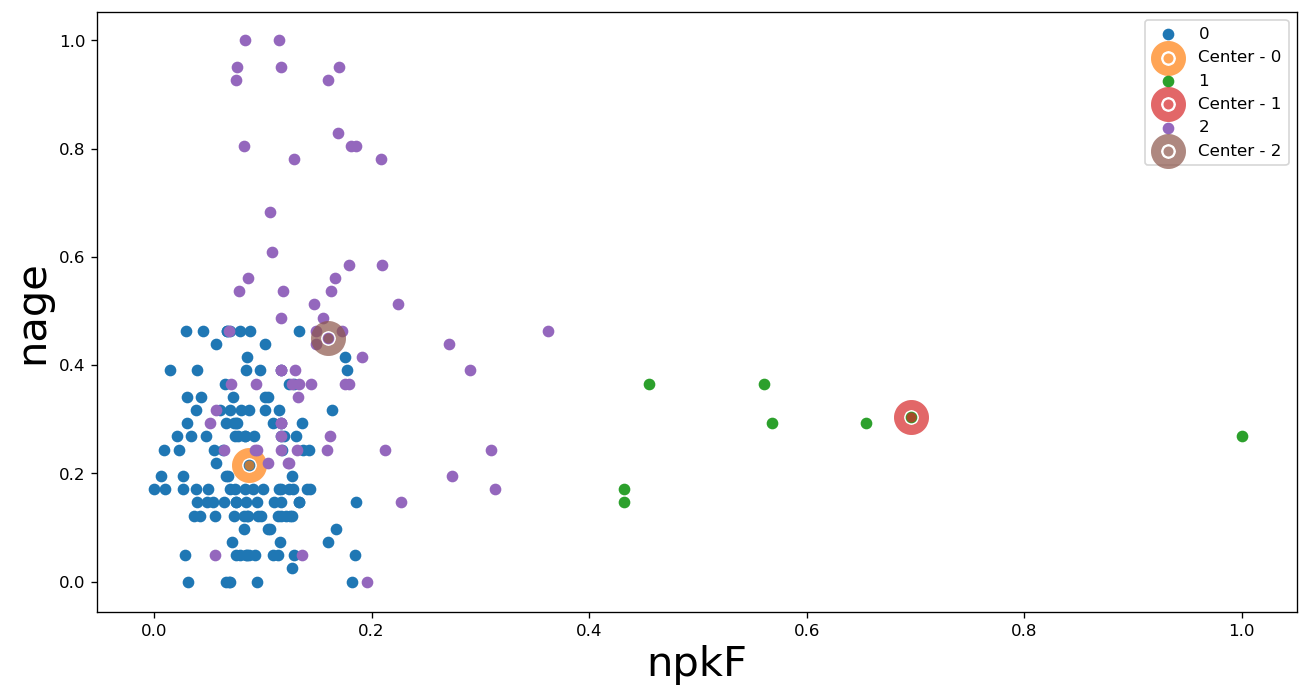

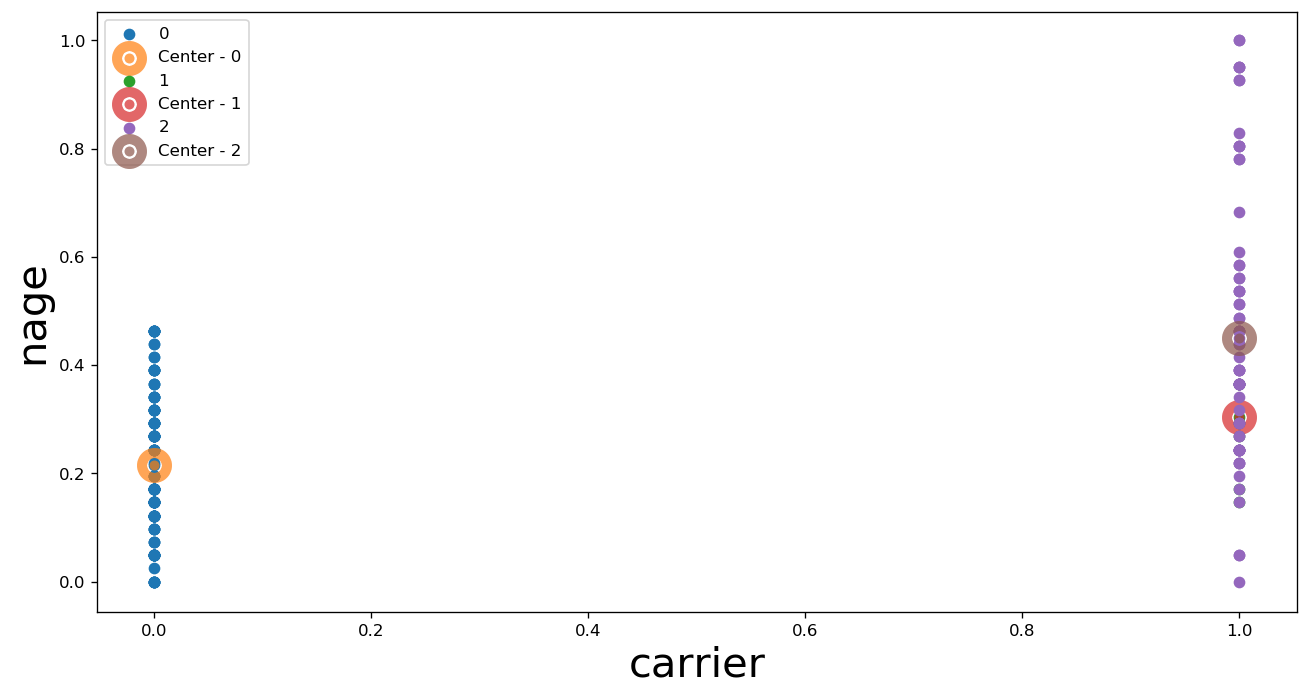

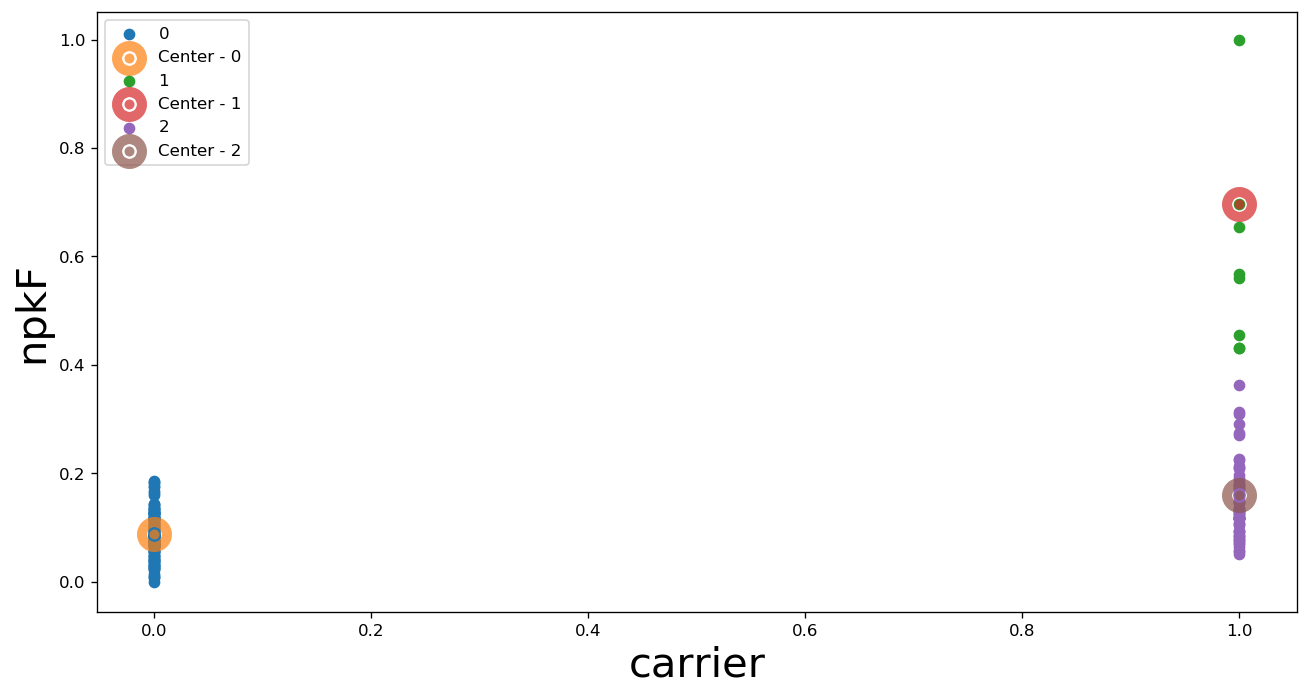

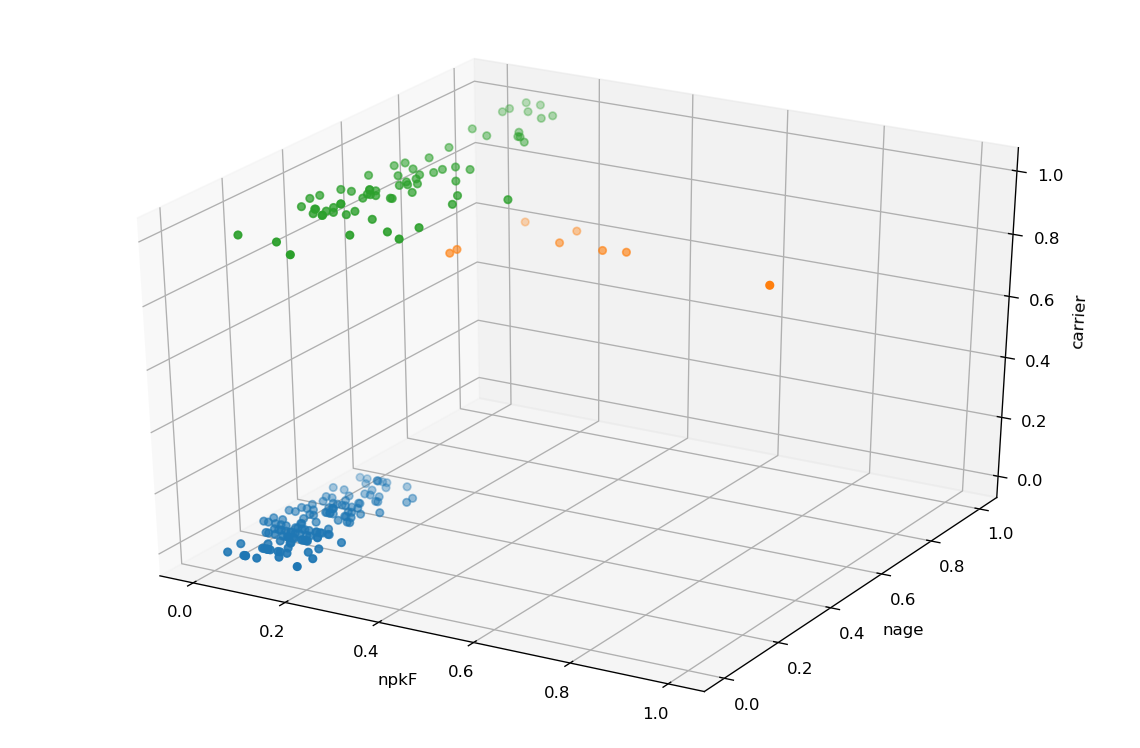

In [10]:
visualization2D_clusters(cl3)
visualization3D_clusters(cl3, col = [1,0,2])

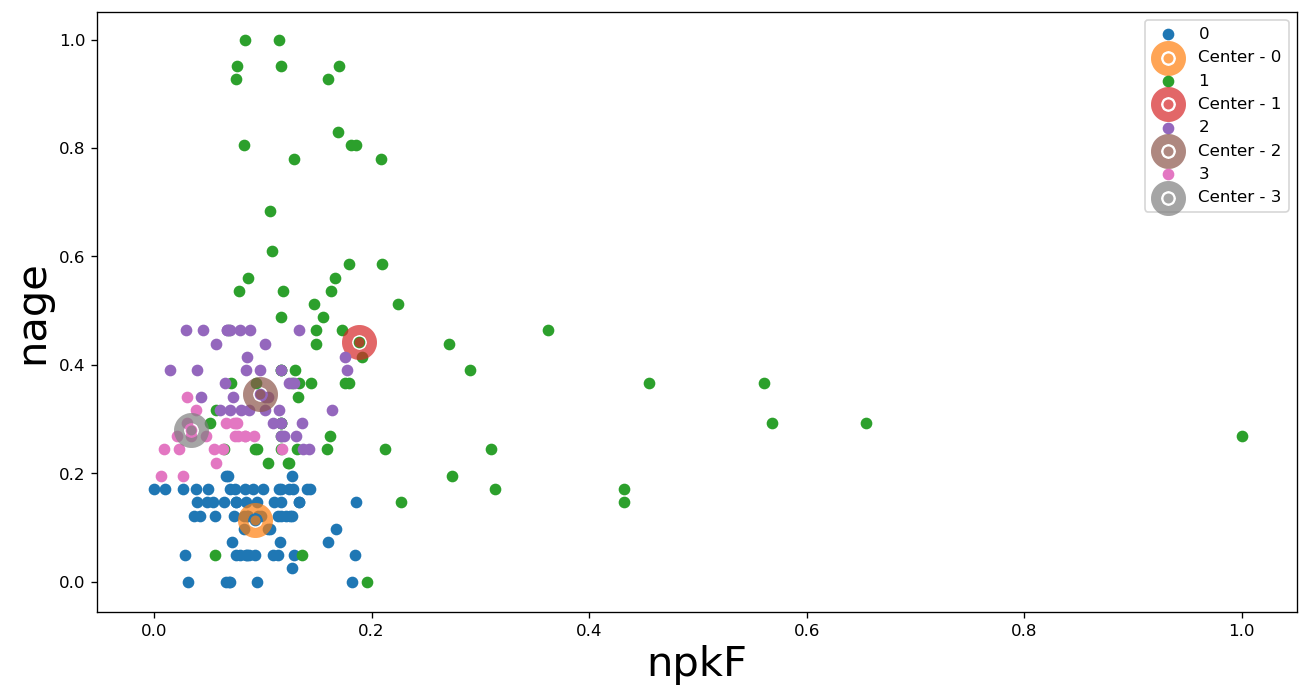

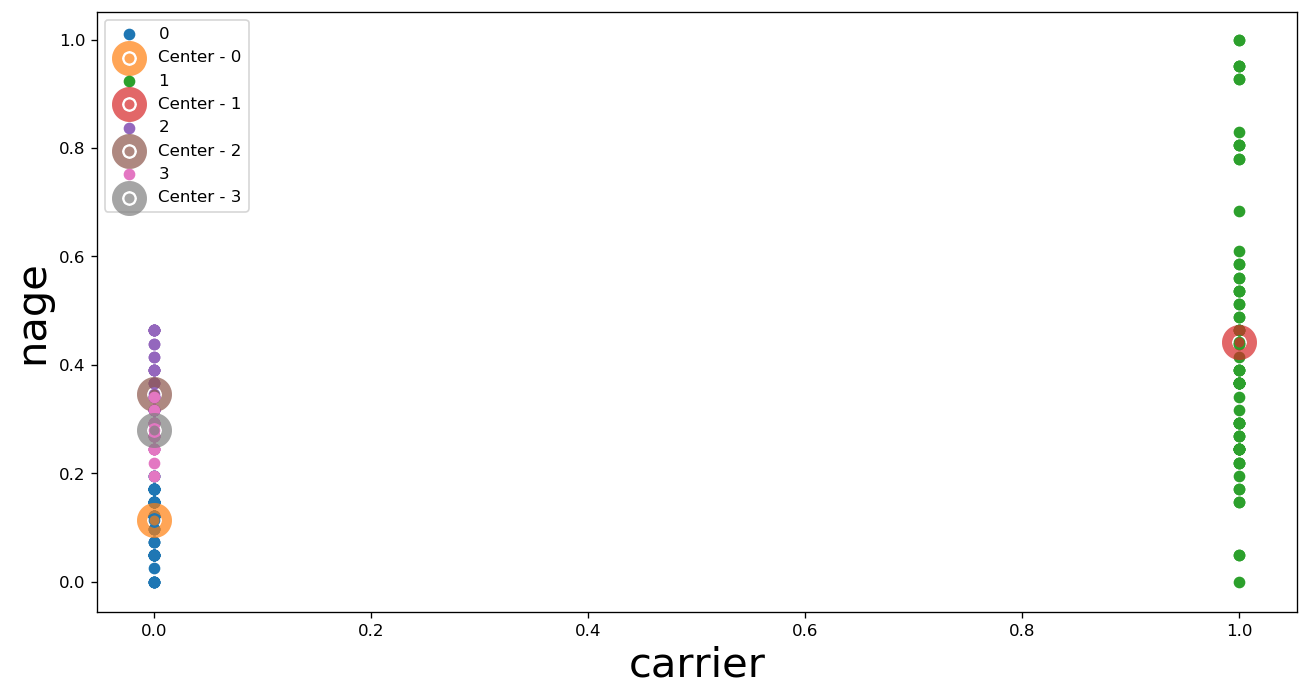

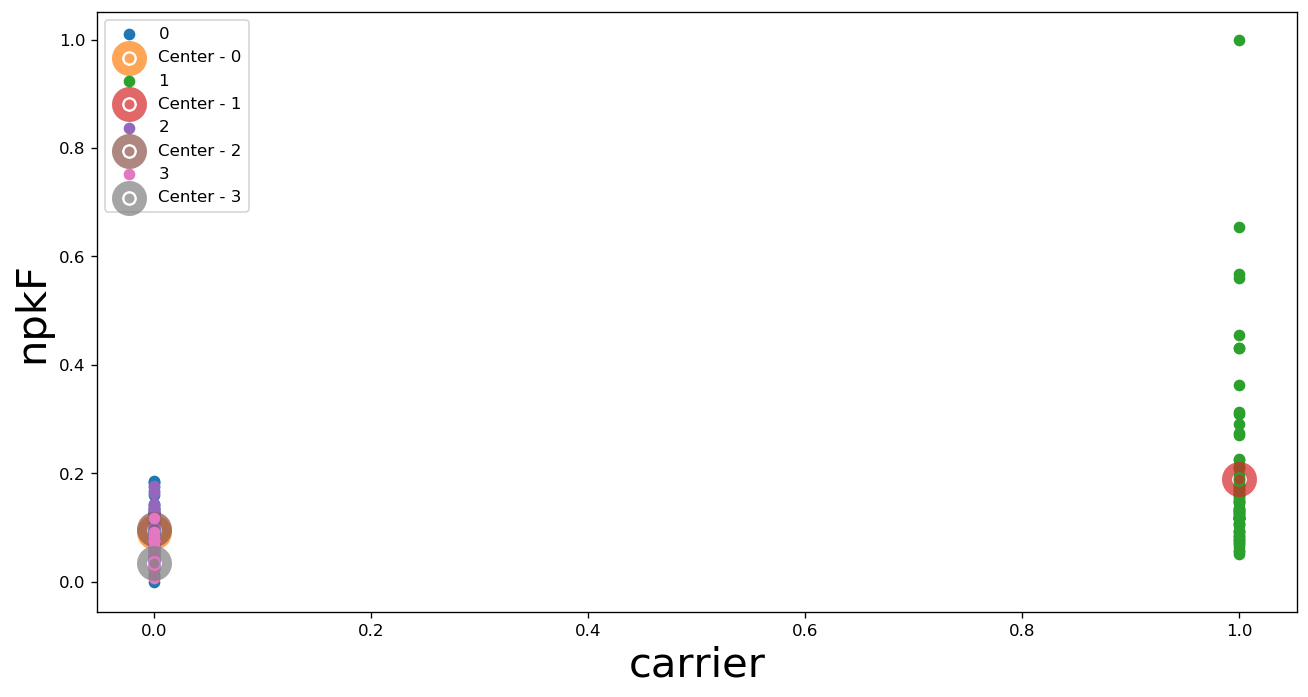

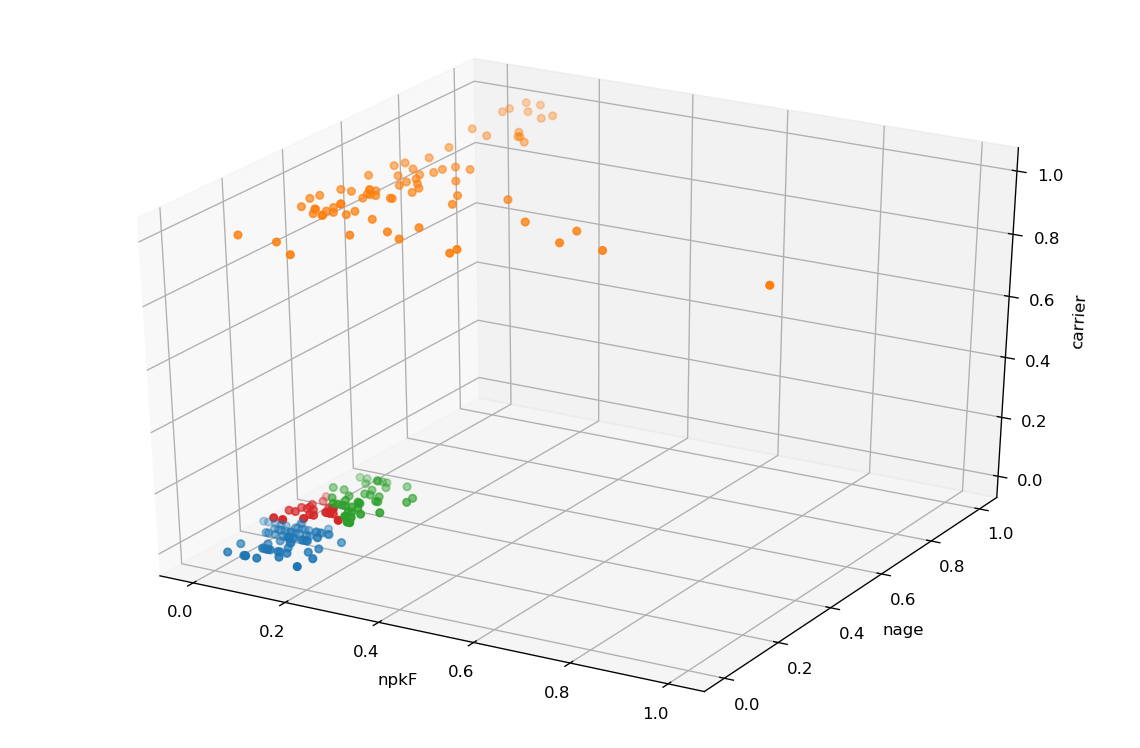

In [11]:
visualization2D_clusters(cl4)
visualization3D_clusters(cl4, col = [1,0,2])

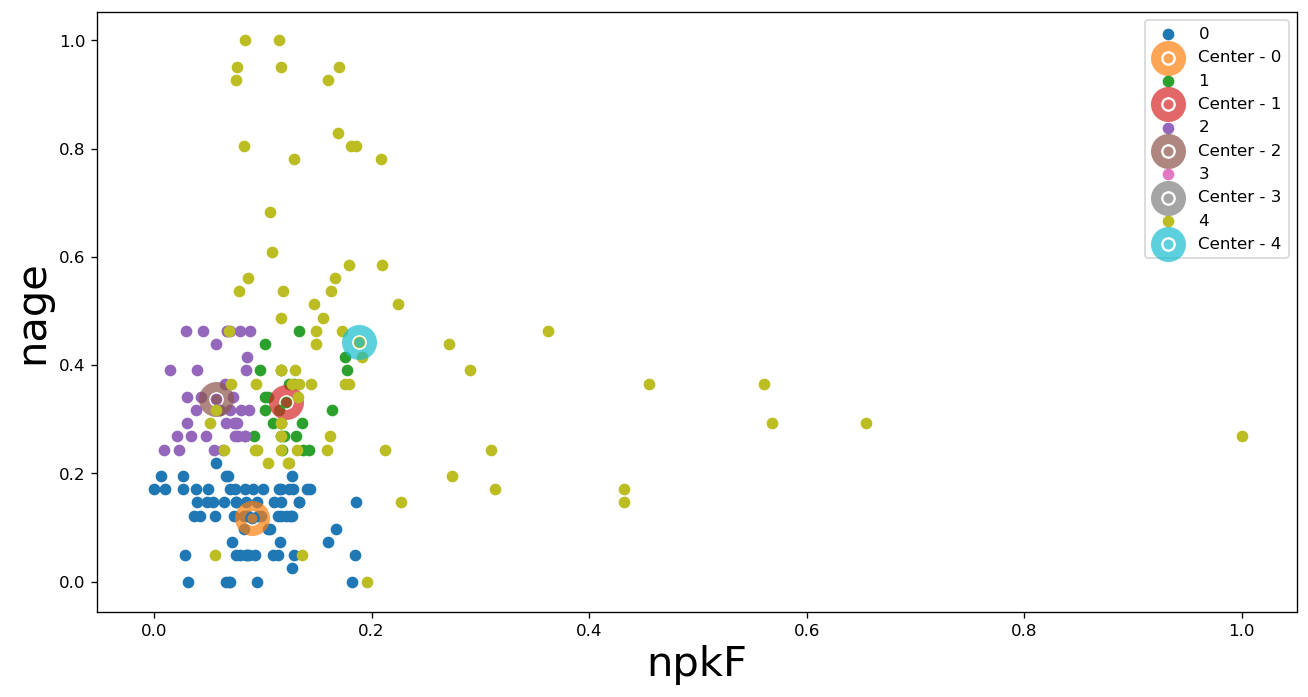

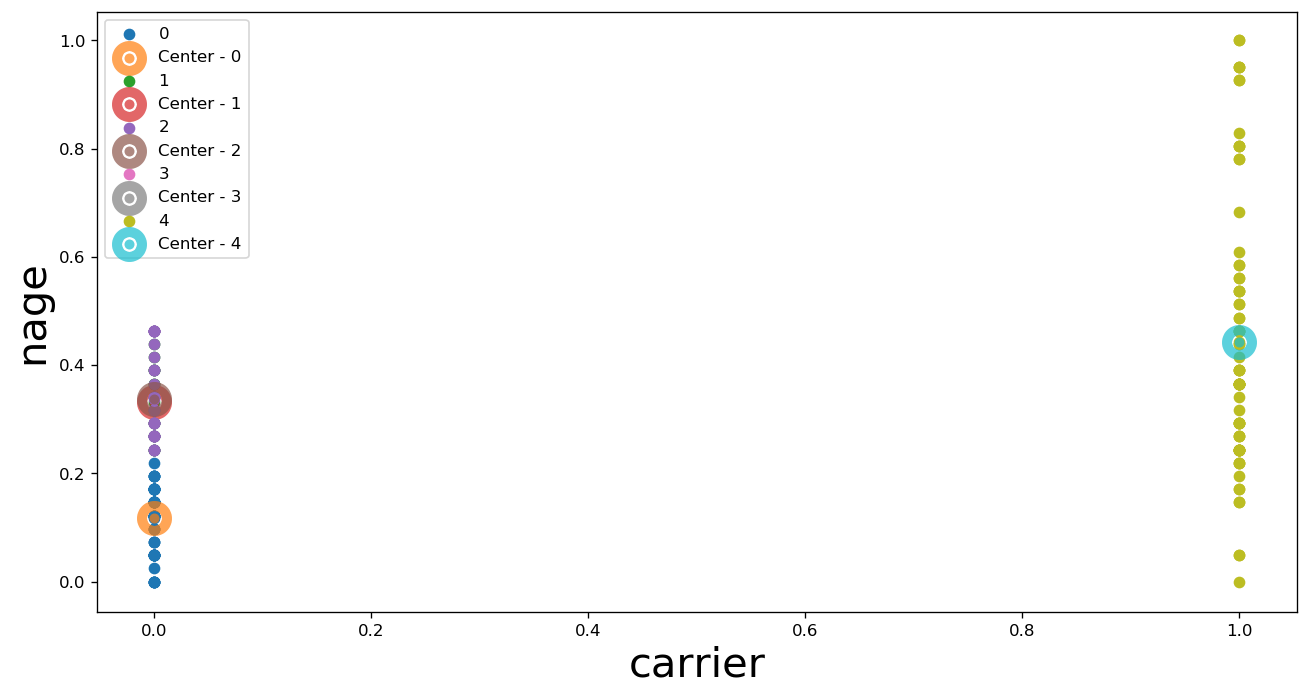

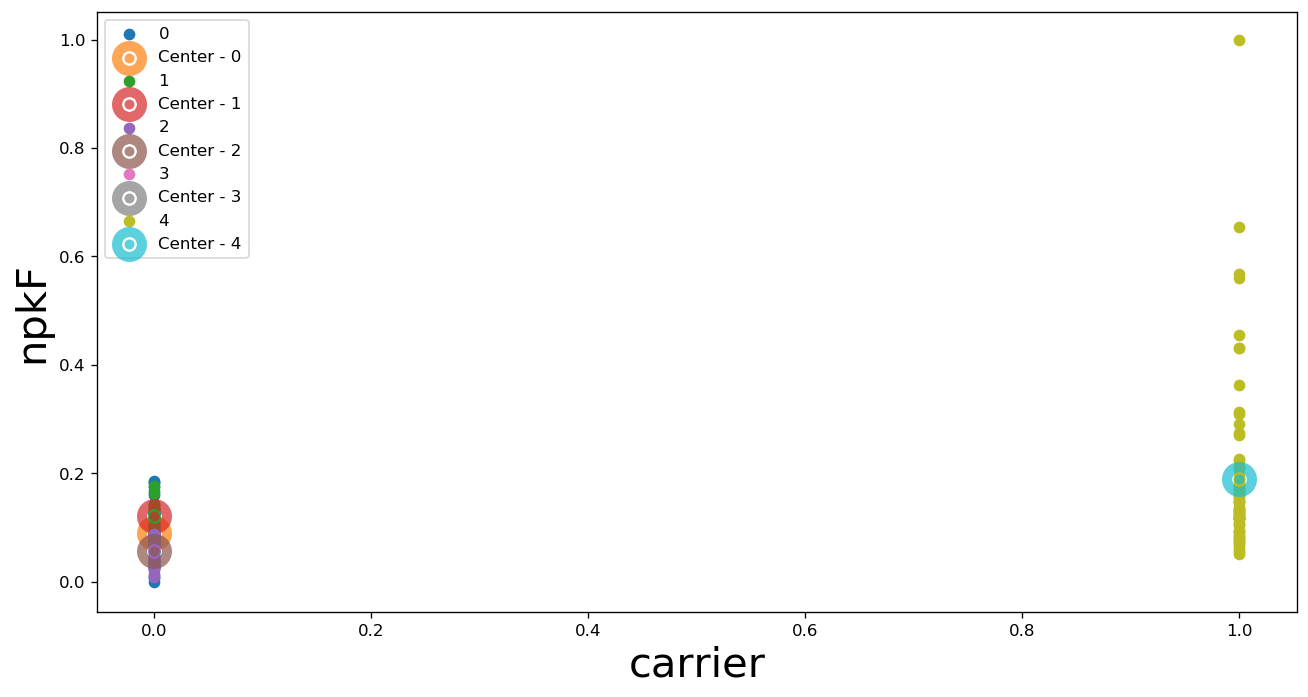

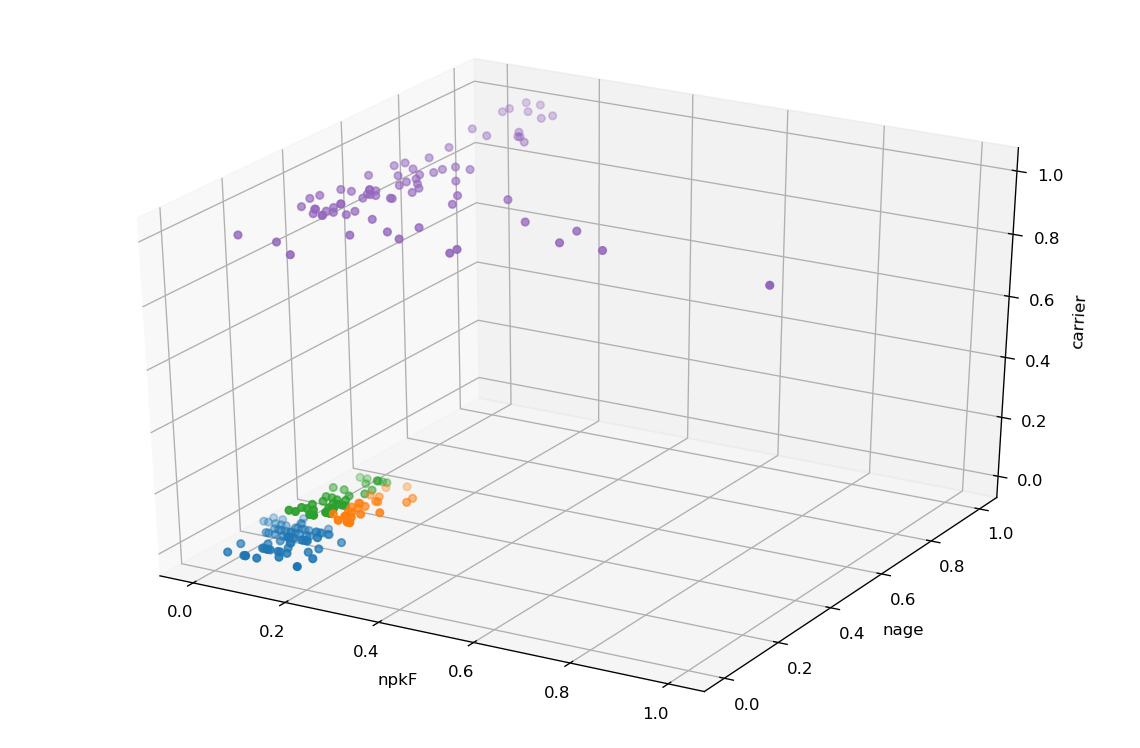

In [12]:
visualization2D_clusters(cl5)
visualization3D_clusters(cl5, col = [1,0,2])

 <h1 align="center" style="color:#4ca8ed">5. Висновки про результати кластеризації (кількість об'єктів в кластеріх, коротка характеристика об'єктів за допомогою описовою статистики).</h1>


Висновок:
В кластерах різна кількість об'єктів. Також слід замітити не зважаючи на випадкову генерацію початкових центрів, при постійній кластеризації можно замітити іноді кластери виходять подібні до отриманих раніше. Особливо це видно при двох кластерах, кожен раз кластера одні і тіж самі. Це наслідок таких данних, так як вони мають параметр який має значення 0 або 1, що вносить сильний вклад при нормованих данних. При більшій же кількості кластерів, вони локалізуються саме між цими двома категоріями.

Візуально:
Якщо ж говорити саме про смисловий зміст даних, то тут три параметри: вік, кількість піруват кінази (фермент, який бере участь у гліколізі) та наявність у пацієнта dmd (м'язевої дистрофії дюшенна). Очевидно видно, що хворих на dmd підвищена активність ферменту піруват кінази, пацієнти без dmd розподілені дуже плотно, тоді як хворі мають дуже високий розмах значень. Найбільшого піку вона має сама для молодих людей. Для людей більш похилого віку активність понижена відносно молодих пацієнтів. Також відсутні не хворі люди похилого віку для того щоб порівняти їх резульатати, так як можно було би визначити чи вік має значення для активності ферменту.
Тому можно говорити що перевірка кількості даного ферменту можно використовувати як один із тестів для діагностування dmd.

Також, можно зробити декілька висновків на основі статистичних параметрів:
Дисперсія - як було сказано раніше, всі кластери локалізуються у двох основних категоріях (хворі і здорові). І по дисперсії кластерів (параметру піруват кінази) можно легко помітити, що кластера які відносяться до хворих мають куди більші значення (наприклад, 0.15), так як у хворих великий розкид значень npkf тоді як у здовових значення дисперсій значно менше (наприклад, 0.04, 0.038), так як значення розташовані більш однорідно. 

Середнє виборки - в кластерах хворих значення значно більше, що говорить про активність піруват кінази в хворих.

По графікам розподілу видна повна картина того розкиду значень піруват кінизи в залежності від наявності хвороби.

In [14]:
for z in range(2,6):
    print(str(z) + " кластера")
    cl = k_means(data,['nage','npkF','carrier'],z)
    for i in cl:
        print(i.describe())
    print("-"*30)
        

2 кластера
            nage       npkF  carrier
count  76.000000  76.000000     76.0
mean    0.442276   0.188530      1.0
std     0.244530   0.152657      0.0
min     0.000000   0.051297      1.0
25%     0.262195   0.116131      1.0
50%     0.378049   0.145965      1.0
75%     0.542683   0.192370      1.0
max     1.000000   1.000000      1.0
             nage        npkF  carrier
count  135.000000  135.000000    135.0
mean     0.214962    0.087171      0.0
std      0.125898    0.040127      0.0
min      0.000000    0.000000      0.0
25%      0.121951    0.064825      0.0
50%      0.170732    0.084875      0.0
75%      0.304878    0.116595      0.0
max      0.463415    0.185629      0.0
------------------------------
3 кластера
            nage       npkF  carrier
count  76.000000  76.000000     76.0
mean    0.442276   0.188530      1.0
std     0.244530   0.152657      0.0
min     0.000000   0.051297      1.0
25%     0.262195   0.116131      1.0
50%     0.378049   0.145965      1.0
75% 

2 кластера
Кластер номер - 0 = здоровий
Кластер номер - 1 = хворий
3 кластера
Кластер номер - 0 = здоровий
Кластер номер - 1 = хворий
Кластер номер - 2 = хворий
4 кластера
Кластер номер - 0 = здоровий
Кластер номер - 1 = здоровий
Кластер номер - 2 = хворий
Кластер номер - 3 = здоровий
5 кластера
Кластер номер - 0 = здоровий
Кластер номер - 1 = здоровий
Кластер номер - 2 = хворий
Кластер номер - 3 = здоровий
Кластер номер - 4 = здоровий


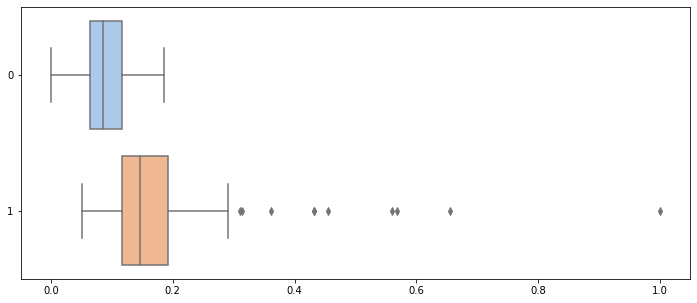

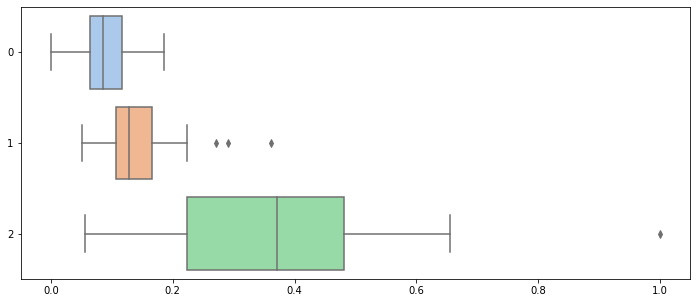

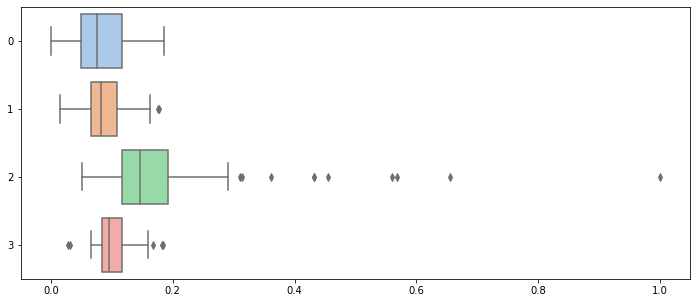

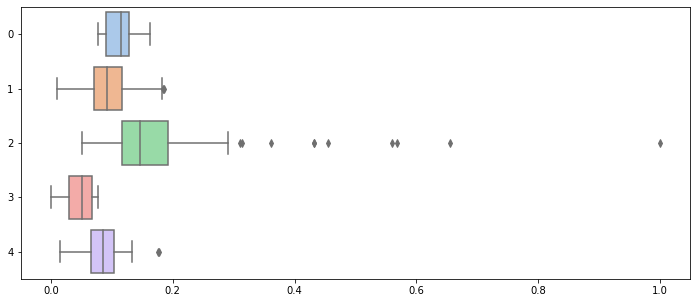

In [21]:
for z in range(2,6):
    cl = k_means(data,['nage','npkF','carrier'],z)
    fig, ax = plt.subplots(figsize=(12,5))
    print(str(z) + " кластера")
    for i in range(len(cl)):
        print('Кластер номер - ' + str(i) + (' = хворий' if(cl[i].iloc[0,2]) else ' = здоровий'))
        cl[i] = cl[i][['npkF']][:]
    fig =  sns.boxplot(orient = "h",data = cl, palette="pastel")